<a href="https://colab.research.google.com/github/Visionary-DataWorks/DSPL-Project/blob/main/DSPL_Code_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Observation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
dataset_path = "/content/traincsv.csv"
df_train = pd.read_csv(dataset_path)

df_train.head()

<ipython-input-2-d209fec36c9c>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(dataset_path)


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
df_train.describe()

,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


In [ ]:
df_train.describe(include='object')

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,774153,774120,774114,774125.00,774154
unique,20,143897,257030,270131.00,18
top,Colombo,1029.6,4296.6,9168.72,1
freq,41031,62,28,23.00,188975


In [ ]:
df_train.shape

(774155, 6)

In [ ]:
# Create metadata DataFrame for all columns
metadata = pd.DataFrame({

    "column": df_train.columns,
    "data_type": [str(df_train[col].dtypes) for col in df_train.columns],
    "Non_Null_Count": [df_train[col].count() for col in df_train.columns],
    "unique_values": [df_train[col].nunique() for col in df_train.columns],
    "Mean": [df_train[col].mean() if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "Median": [df_train[col].median() if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "Min": [df_train[col].min() if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "Max": [df_train[col].max() if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "Std_Dev": [df_train[col].std() if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "25th_Percentile": [df_train[col].quantile(0.25) if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "50th_Percentile": [df_train[col].quantile(0.50) if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns],
    "75th_Percentile": [df_train[col].quantile(0.75) if pd.api.types.is_numeric_dtype(df_train[col]) else None for col in df_train.columns]
})


# Display the metadata DataFrame
print(metadata)


             column data_type  Non_Null_Count  unique_values          Mean  \
0       Customer_ID   float64          774153         774153  1.038708e+07   
1       outlet_city    object          774153             20           NaN   
2      luxury_sales    object          774120         143897           NaN   
3       fresh_sales    object          774114         257030           NaN   
4         dry_sales    object          774125         270131           NaN   
5  cluster_catgeory    object          774154             18           NaN   

       Median         Min         Max        Std_Dev  25th_Percentile  \
0  10387077.0  10000000.0  10774154.0  223479.479936       10193538.0   
1         NaN         NaN         NaN            NaN              NaN   
2         NaN         NaN         NaN            NaN              NaN   
3         NaN         NaN         NaN            NaN              NaN   
4         NaN         NaN         NaN            NaN              NaN   
5         NaN  

In [ ]:
# Display Columns
list(df_train.columns)

['Customer_ID',
 'outlet_city',
 'luxury_sales',
 'fresh_sales',
 'dry_sales',
 'cluster_catgeory']

In [ ]:
# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df_train.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {column}:")
    print(df_train[column].unique())


Unique Values in Categorical Columns:

Unique values for outlet_city:
['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy' nan]

Unique values for luxury_sales:
['1209.6' '1590.12' '2288.88' ... '2624.65' '5121.42' '5833.5']

Unique values for fresh_sales:
[756.0 1060.08 1481.04 ... '3723.52' '4740.83' '4820.16']

Unique values for dry_sales:
[5292.0 6007.12 9155.52 ... 3448.44 6275.15 6611.3]

Unique values for cluster_catgeory:
['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]


In [ ]:
# Check for missing values
missing_values = df_train.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


In [ ]:
df_train.isna().sum()/len(df_train)*100

,0
Customer_ID,0.000258
outlet_city,0.000258
luxury_sales,0.004521
fresh_sales,0.005296
dry_sales,0.003875
cluster_catgeory,0.000129


In [ ]:
#pip install plotly
import plotly.express as px

luxury_sales_fig = px.histogram(df_train, x='luxury_sales')
luxury_sales_fig.show()

fresh_sales_fig = px.histogram(df_train, x='fresh_sales')
fresh_sales_fig.show()

dry_sales_fig = px.histogram(df_train, x='dry_sales')
dry_sales_fig.show()


In [ ]:
# Check for duplicate rows
duplicates = df_train.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [ ]:
#Visualizing outliers

luxury_sales = px.box(df_train, x='luxury_sales')
luxury_sales.show()

fresh_sales = px.box(df_train, x='fresh_sales')
fresh_sales.show()

dry_sales = px.box(df_train, x='dry_sales')
dry_sales.show()

cluster_catgeory = px.box(df_train, x='cluster_catgeory')
cluster_catgeory.show()

# Preprocessing

In [ ]:
#renaming misspelled columns
#Rename cluster_catgeory column
df_train.rename({'cluster_catgeory' : 'cluster_category' }, axis = 1, inplace = True)

#correcting cluster category values with replace
df_train.replace('6//', '6', inplace=True)


In [ ]:
# Handle missing values
df_train.replace(['', 'null', 'nul'], np.nan, inplace=True)

# Convert 'luxury_sales', 'fresh_sales', and 'dry_sales' to numeric
df_train['luxury_sales'] = pd.to_numeric(df_train['luxury_sales'], errors='coerce')
df_train['fresh_sales'] = pd.to_numeric(df_train['fresh_sales'], errors='coerce')
df_train['dry_sales'] = pd.to_numeric(df_train['dry_sales'], errors='coerce')

#meadian imputation
df_train['luxury_sales'].fillna(df_train['luxury_sales'].median(), inplace=True)
df_train['fresh_sales'].fillna(df_train['fresh_sales'].median(), inplace=True)
df_train['dry_sales'].fillna(df_train['dry_sales'].median(), inplace=True)

#mode imputaion
df_train['outlet_city'].fillna(df_train['outlet_city'].mode()[0], inplace=True)

df_train['cluster_category'] = pd.to_numeric(df_train['cluster_category'], errors='coerce')
df_train = df_train.dropna(subset=['cluster_category'])
df_train['cluster_category'] = df_train['cluster_category'].astype(int)


<ipython-input-17-a42c55243227>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-17-a42c55243227>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

Reference : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
#changing data types

# Convert data types
df_train['Customer_ID'] = df_train['Customer_ID'].astype('object')
df_train['luxury_sales'] = df_train['luxury_sales'].astype('float')
df_train['fresh_sales'] = df_train['fresh_sales'].astype('float')
df_train['dry_sales'] = df_train['dry_sales'].astype('float')
df_train['cluster_category'] = df_train['cluster_category'].astype('int')


<ipython-input-18-36dc6b8deadd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-36dc6b8deadd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-36dc6b8deadd>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-36dc6b8

In [ ]:
#Cheacking the misiing values
df_train.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,0


We changed customer ID to object because it as int there will be null values and when we cleaned it data rows get deleted so in that case data set will reduced.

In [ ]:
# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df_train.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {column}:")
    print(df_train[column].unique())


Unique Values in Categorical Columns:

Unique values for Customer_ID:
[10493832.0 10178643.0 10513916.0 ... 10565682.0 10351977.0 10637635.0]

Unique values for outlet_city:
['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy']


In [ ]:
#Print unique values for numerical columns
print("\nUnique Values in Numerical Columns:")
for column in df_train.select_dtypes(include=['number']).columns:
    print(f"\nUnique values for {column}:")
    print(df_train[column].unique())



Unique Values in Numerical Columns:

Unique values for luxury_sales:
[1209.6  1590.12 2288.88 ... 2624.65 5121.42 5833.5 ]

Unique values for fresh_sales:
[ 756.   1060.08 1481.04 ... 3723.52 4740.83 4820.16]

Unique values for dry_sales:
[5292.   6007.12 9155.52 ... 2225.8  6275.15 6611.3 ]

Unique values for cluster_category:
[  4   1  99   2   5   3   6  95  98 100  89]


We encoded outlet city to numbers becuase we can analyse it properly.

In [ ]:
# Encoding categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['city_encoded'] = label_encoder.fit_transform(df_train['outlet_city'])

In [ ]:
df_train.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,city_encoded
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,11
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,13
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,19
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,19
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,11


In [ ]:
def find_outliers_IQR(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  IQR=q3-q1
  outliers = data[((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR)))]
  return outliers


In [ ]:
outliers = find_outliers_IQR(df_train['luxury_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 35059


,luxury_sales
327511,4514.84
327515,4248.30
327521,5053.76
327522,4169.40
327525,4428.93
...,...
774148,5264.00
774151,6095.86
774152,5121.42
774153,6311.76


In [ ]:
outliers = find_outliers_IQR(df_train['fresh_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,fresh_sales


In [ ]:
outliers = find_outliers_IQR(df_train['dry_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,dry_sales


In [ ]:
outliers = find_outliers_IQR(df_train['cluster_category'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 5


,cluster_category
17,99
172456,95
172689,98
555703,100
558115,89


In [ ]:
# Find outlier indices luxury sales
outlier_indices = find_outliers_IQR(df_train['cluster_category']).index


# Display the indices of the outliers
print("Outlier Indices: ", outlier_indices)

Outlier Indices:  Index([17, 172456, 172689, 555703, 558115], dtype='int64')


In [ ]:
# Remove outliers
df_train = df_train.drop(outlier_indices)

In [ ]:
outliers = find_outliers_IQR(df_train['cluster_category'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,cluster_category


In [ ]:
# Check unique values in cluster_category
unique_values = df_train['cluster_category'].unique()
print("Unique values in 'cluster_category':", unique_values)


Unique values in 'cluster_category': [4 1 2 5 3 6]


In [ ]:

luxury_sales = px.box(df_train, x='luxury_sales')
luxury_sales.show()

fresh_sales = px.box(df_train, x='fresh_sales')
fresh_sales.show()

dry_sales = px.box(df_train, x='dry_sales')
dry_sales.show()

cluster_category = px.box(df_train, x='cluster_category')
cluster_category.show()

# EDA

Univariate analysis

In [ ]:
#number of custoemrs per outlet city
df_train.value_counts(subset = df_train.outlet_city)

,count
outlet_city,
Colombo,41033
Batticaloa,41012
Galle,41009
Kalmunai,40710
Negombo,40703
Jaffna,40675
Katunayake,40648
Kandy,40534
Trincomalee,40528


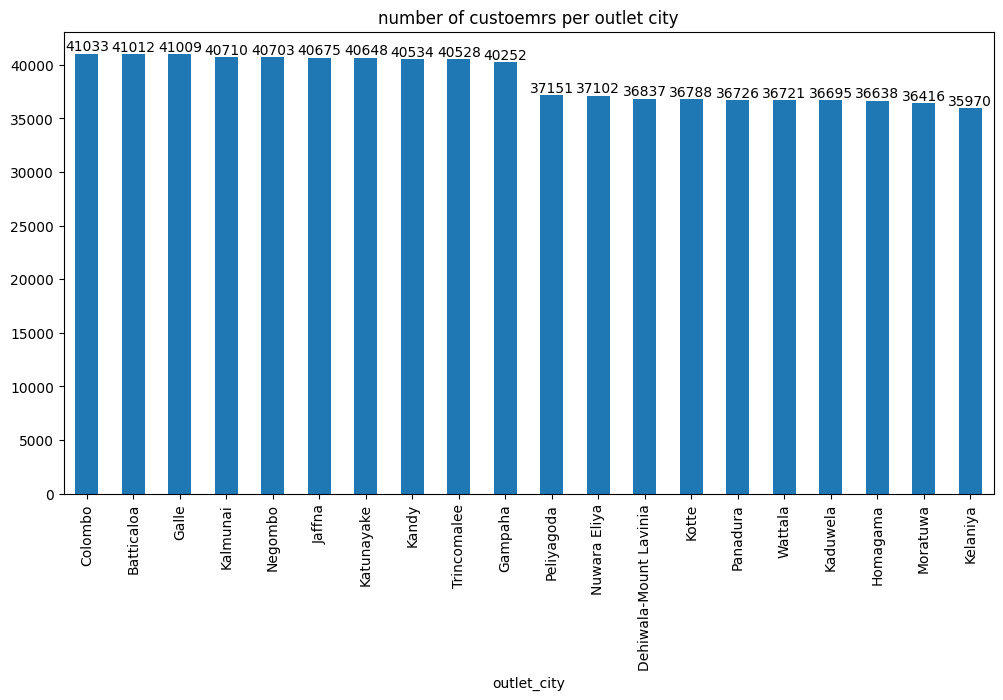

In [ ]:
#create a bar graph
plt.figure(figsize=(12,6))
df_train['outlet_city'].value_counts().plot(kind='bar', color=['tab:blue'])
plt.title('number of custoemrs per outlet city')
plt.xlabel('outlet_city')

#adding data labels
counts = df_train['outlet_city'].value_counts()
for i, count in enumerate(counts):
  plt.text(i, count + 1, str(count), ha = 'center', va = 'bottom')
plt.show()

In [ ]:
# Get the number of customers per cluster category
df_customers_per_cluster = df_train.value_counts(subset=['cluster_category'])

# Sort the result by the index (cluster category) in ascending order
df_customers_per_cluster_sorted = df_customers_per_cluster.sort_index(ascending=True)

# Print the sorted output
print(df_customers_per_cluster_sorted)


cluster_category
1                   188984
2                   155064
3                    48907
4                   172439
5                    39540
6                   169214
Name: count, dtype: int64


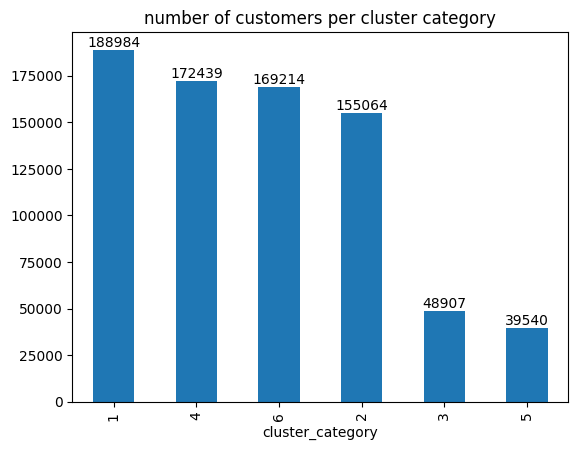

In [ ]:
#create a bar graph
df_train['cluster_category'].value_counts().plot(kind='bar', color=['tab:blue'])
plt.title('number of customers per cluster category')
plt.xlabel('cluster_category')

#adding data labels
counts = df_train['cluster_category'].value_counts()
for i, count in enumerate(counts):
  plt.text(i, count + 1, str(count), ha = 'center', va = 'bottom')
plt.show()

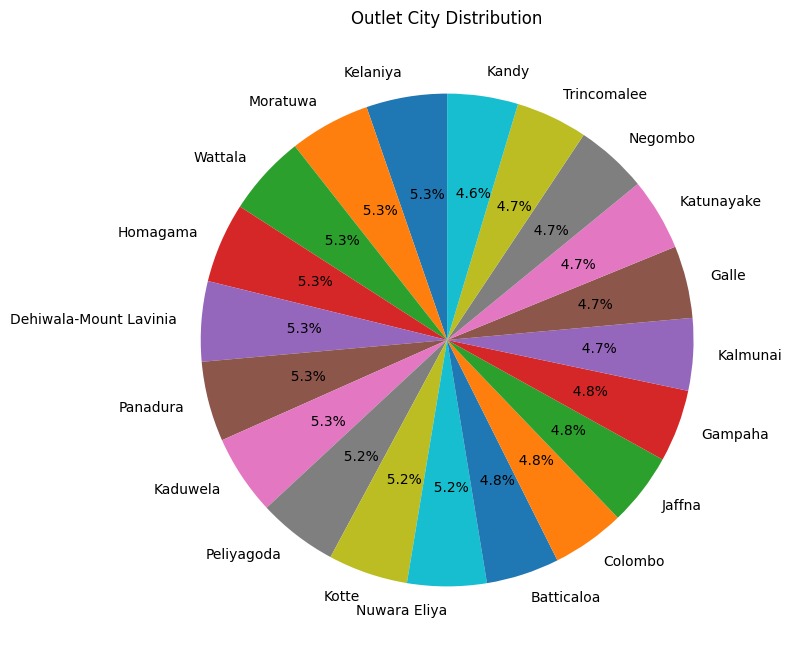

In [ ]:
#create pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_train['outlet_city'].value_counts(), labels=df_train['outlet_city'].unique(), autopct='%5.1f%%', startangle=90)
plt.title('Outlet City Distribution')
plt.show()

Numerical variables

In [ ]:
##Checkiing the statistical analysis
df_train.describe()

,luxury_sales,fresh_sales,dry_sales,cluster_category,city_encoded
count,774148.000000,774148.000000,774148.000000,774148.000000,774148.000000
mean,1921.958206,4428.620054,4676.234803,3.292100,9.382063
std,1004.052739,3334.564115,3409.310680,1.867013,5.778112
min,500.000000,500.000000,500.000000,1.000000,0.000000
25%,1213.560000,1620.235000,1788.000000,2.000000,4.000000
50%,1715.280000,3356.480000,3727.760000,3.000000,9.000000
75%,2338.650000,6671.280000,7161.760000,5.000000,14.000000
max,6999.650000,13997.900000,13999.300000,6.000000,19.000000


In [ ]:
Numerical_columns = df_train.select_dtypes(include=['number']).columns
print("Numerical_columns: ",Numerical_columns)




Numerical_columns:  Index(['luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_category',
       'city_encoded'],
      dtype='object')


In [ ]:
df_train.describe()

,luxury_sales,fresh_sales,dry_sales,cluster_category,city_encoded
count,774148.000000,774148.000000,774148.000000,774148.000000,774148.000000
mean,1921.958206,4428.620054,4676.234803,3.292100,9.382063
std,1004.052739,3334.564115,3409.310680,1.867013,5.778112
min,500.000000,500.000000,500.000000,1.000000,0.000000
25%,1213.560000,1620.235000,1788.000000,2.000000,4.000000
50%,1715.280000,3356.480000,3727.760000,3.000000,9.000000
75%,2338.650000,6671.280000,7161.760000,5.000000,14.000000
max,6999.650000,13997.900000,13999.300000,6.000000,19.000000


Visualizing numeric variables

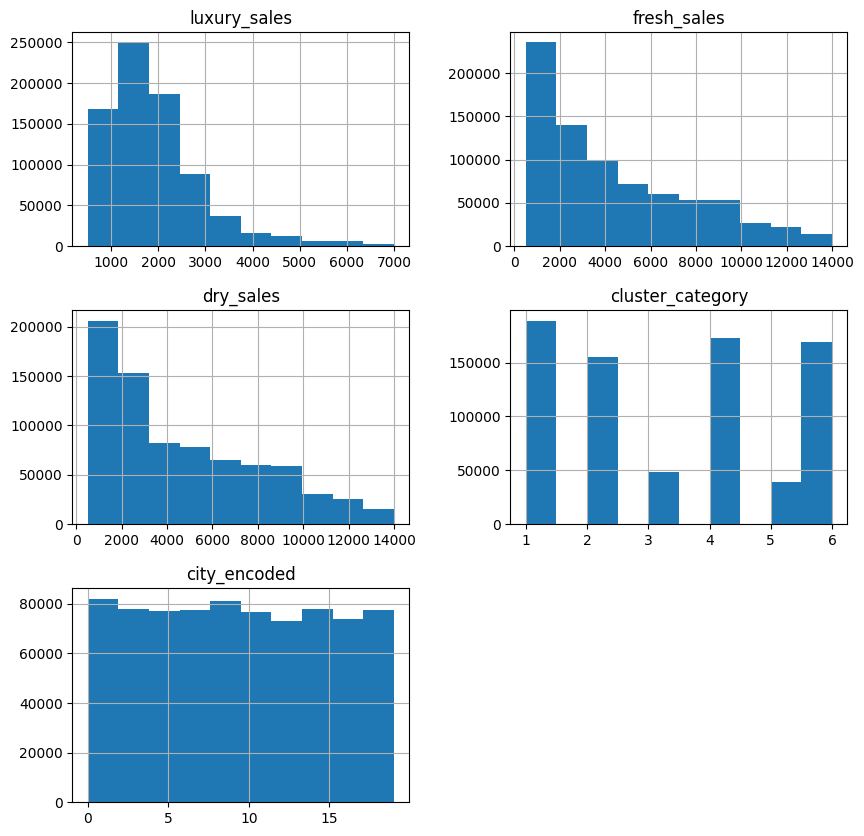

In [ ]:
#Generating histograms
df_train.hist(figsize=(10, 10))
plt.show()

outline in luxury_sales are justified beacuse luxury goods in herently have higher price variations.No need for removal as these high-spending customers form a distinct and valuable segment.Instead of removing ,we can analyze them separately to identify VIP customers for exclusive marketing strategies


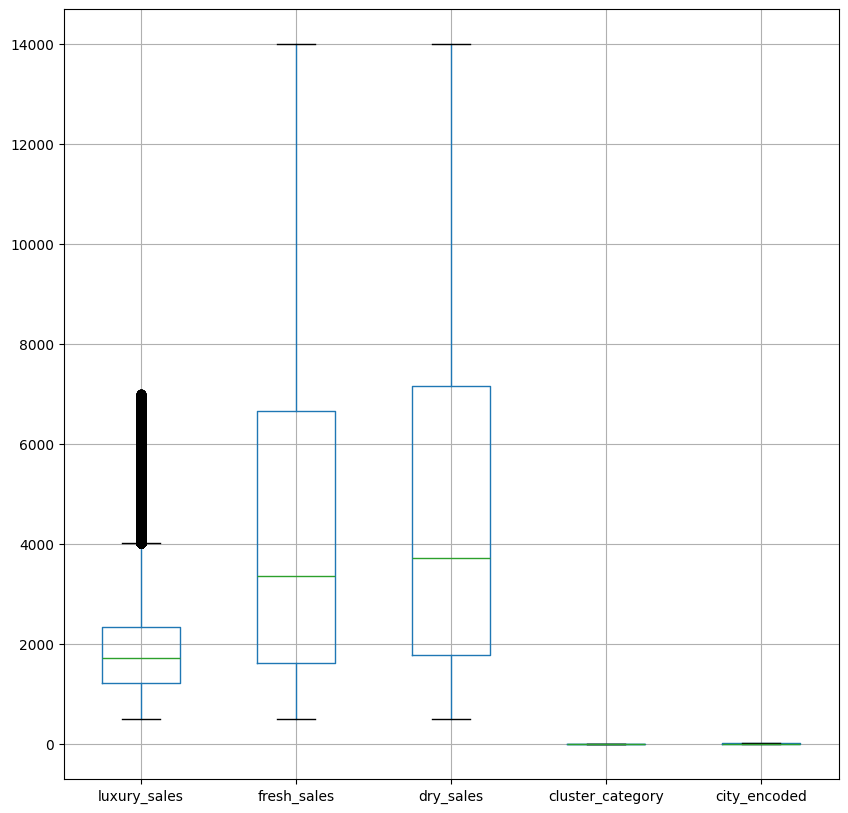

In [ ]:
#create box plot
df_train.boxplot(figsize=(10, 10))
plt.show()

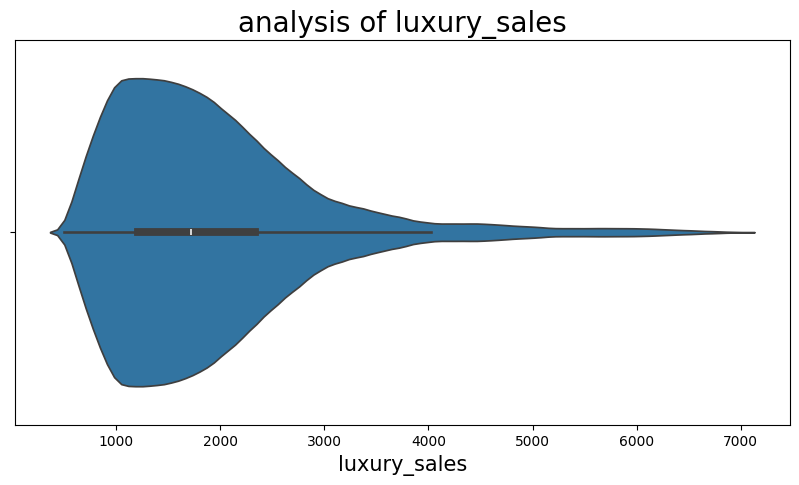

In [ ]:
#Create a violin plot
plt.figure(figsize= (10,5))
ax = sns.violinplot(data = df_train, x= df_train["luxury_sales"])
ax.set_xlabel('luxury_sales',fontsize = 15)
ax.set_title('analysis of luxury_sales', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

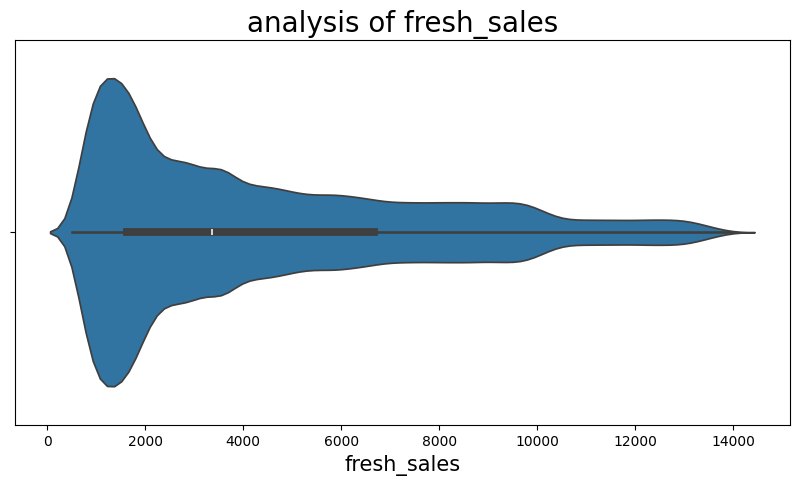

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.violinplot(data = df_train, x= df_train["fresh_sales"])
ax.set_xlabel('fresh_sales',fontsize = 15)
ax.set_title('analysis of fresh_sales', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

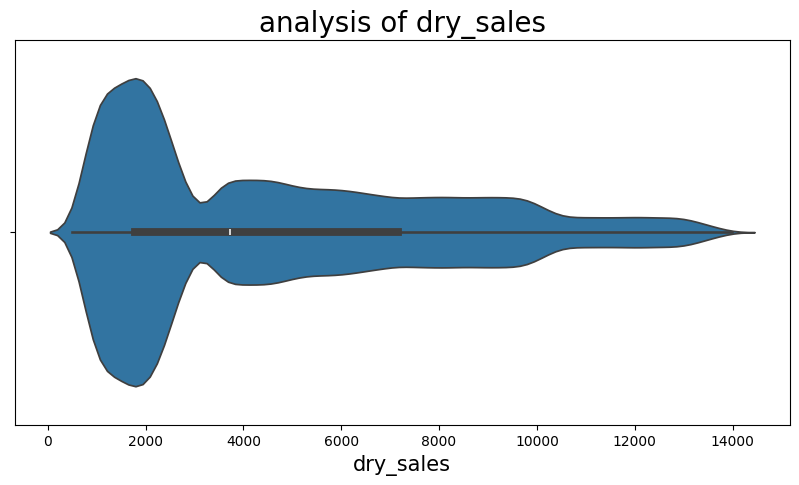

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.violinplot(data = df_train, x= df_train["dry_sales"])
ax.set_xlabel('dry_sales',fontsize = 15)
ax.set_title('analysis of dry_sales', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

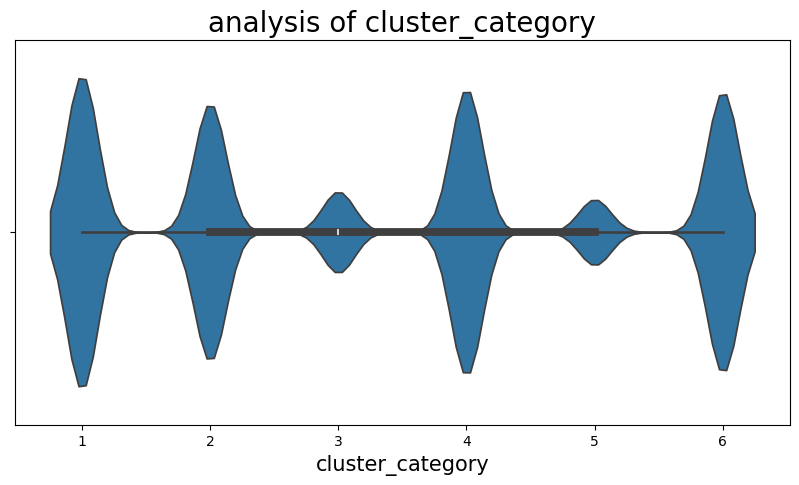

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.violinplot(data = df_train, x= df_train["cluster_category"])
ax.set_xlabel('cluster_category',fontsize = 15)
ax.set_title('analysis of cluster_category', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

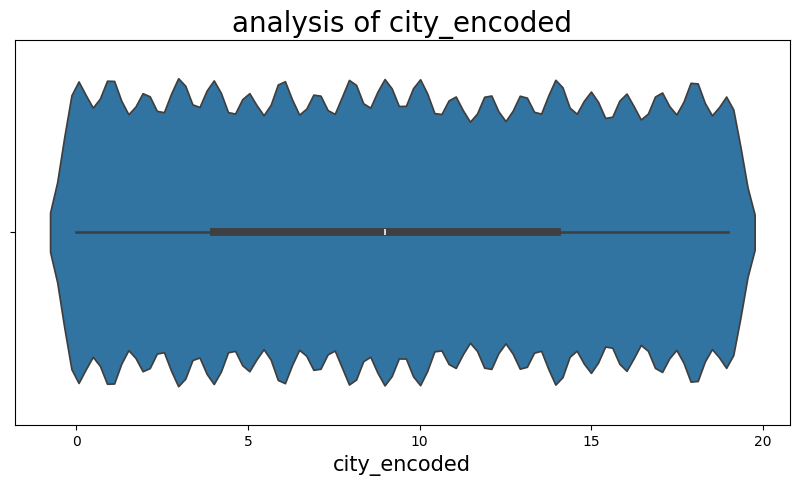

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.violinplot(data = df_train, x= df_train["city_encoded"])
ax.set_xlabel('city_encoded',fontsize = 15)
ax.set_title('analysis of city_encoded', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')

##Multivariate Analysis

Categorical - Categorical

In [ ]:
#create a crosstab
crosstab_result = pd.crosstab(df_train['outlet_city'], df_train['cluster_category'])
print(crosstab_result)

cluster_category            1      2     3      4     5      6
outlet_city                                                   
Batticaloa              18960      2  4901      0     2  17147
Colombo                 19023      0  4959      3     2  17046
Dehiwala-Mount Lavinia      1  15648     0  17283  3902      3
Galle                   19034      2  4932      1     3  17037
Gampaha                 18763      1  4833      0     1  16654
Homagama                    2  15464     0  17220  3951      1
Jaffna                  18822      2  4906      3     2  16940
Kaduwela                    1  15478     1  17360  3853      2
Kalmunai                18852      3  4831      1     1  17022
Kandy                   18898      0  4843      2     0  16791
Katunayake              19080      2  4818      0     2  16746
Kelaniya                    1  15364     0  16802  3800      3
Kotte                       2  15500     1  17252  4029      4
Moratuwa                    2  15387     0  17104  3922

Categorical -Numerical

In [ ]:
#pivot table
pivot_table = df_train.pivot_table(index='outlet_city', values='luxury_sales', aggfunc='mean')
print(pivot_table)

                        luxury_sales
outlet_city                         
Batticaloa               2127.825005
Colombo                  2124.772409
Dehiwala-Mount Lavinia   1692.752268
Galle                    2127.075014
Gampaha                  2116.046320
Homagama                 1698.885078
Jaffna                   2124.764573
Kaduwela                 1698.253797
Kalmunai                 2114.907078
Kandy                    2123.476647
Katunayake               2114.212498
Kelaniya                 1691.750808
Kotte                    1698.310632
Moratuwa                 1698.895165
Negombo                  2128.758364
Nuwara Eliya             1709.336626
Panadura                 1698.627556
Peliyagoda               1703.396001
Trincomalee              2126.845302
Wattala                  1700.541153


In [ ]:
pivot_table = df_train.pivot_table(index='outlet_city', values='fresh_sales', aggfunc='mean')
print(pivot_table)

                        fresh_sales
outlet_city                        
Batticaloa              5025.864086
Colombo                 5016.950506
Dehiwala-Mount Lavinia  3791.558594
Galle                   5011.892306
Gampaha                 4983.613916
Homagama                3783.255898
Jaffna                  5019.588054
Kaduwela                3785.192007
Kalmunai                5009.450869
Kandy                   5012.999223
Katunayake              4968.743452
Kelaniya                3801.449727
Kotte                   3771.959391
Moratuwa                3791.357947
Negombo                 5010.886875
Nuwara Eliya            3771.656467
Panadura                3799.713555
Peliyagoda              3799.200148
Trincomalee             5012.329140
Wattala                 3773.008530


In [ ]:
pivot_table = df_train.pivot_table(index='outlet_city', values='dry_sales', aggfunc='mean')
print(pivot_table)

                          dry_sales
outlet_city                        
Batticaloa              5053.983633
Colombo                 5041.190141
Dehiwala-Mount Lavinia  4245.432437
Galle                   5068.087483
Gampaha                 5062.512726
Homagama                4257.238822
Jaffna                  5043.786248
Kaduwela                4279.756572
Kalmunai                5039.171891
Kandy                   5064.294759
Katunayake              5077.631184
Kelaniya                4237.727815
Kotte                   4248.422243
Moratuwa                4262.213341
Negombo                 5056.663191
Nuwara Eliya            4287.413545
Panadura                4256.492271
Peliyagoda              4242.013494
Trincomalee             5037.804113
Wattala                 4249.682963


Numerical -Numerical

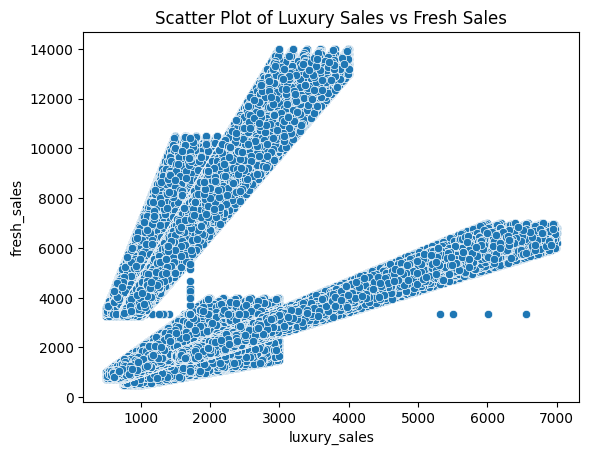

In [ ]:
#scatter plot
#luxury sales and fresh sales
plt.figure
sns.scatterplot(data = df_train, x = 'luxury_sales', y = 'fresh_sales')
plt.title("Scatter Plot of Luxury Sales vs Fresh Sales")
plt.show()

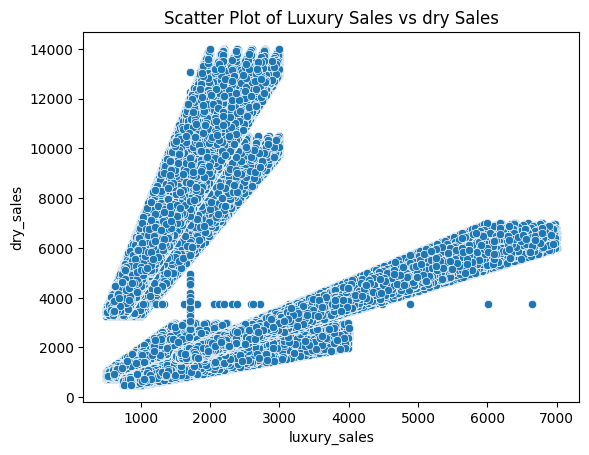

In [ ]:
#luxury_sales anddry_sales
plt.figure
sns.scatterplot(data = df_train, x = 'luxury_sales', y = 'dry_sales')
plt.title("Scatter Plot of Luxury Sales vs dry Sales")
plt.show()

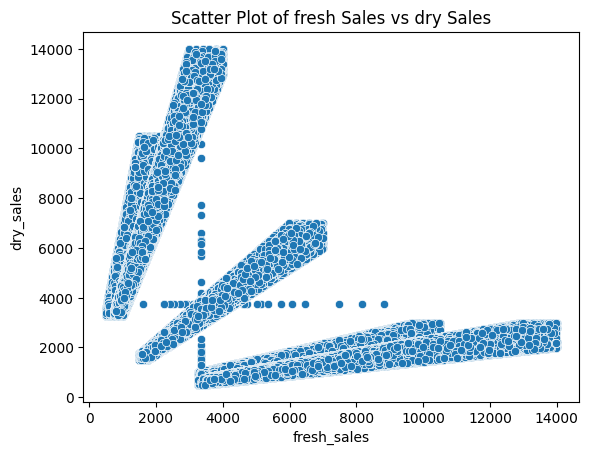

In [ ]:
#frsh_sales and dry_sales
plt.figure
sns.scatterplot(data = df_train, x = 'fresh_sales', y = 'dry_sales')
plt.title("Scatter Plot of fresh Sales vs dry Sales")
plt.show()

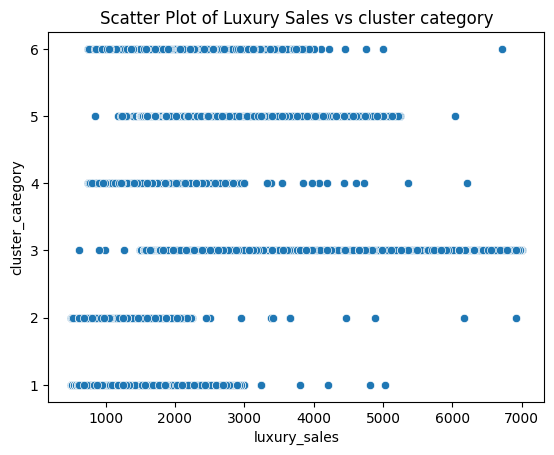

In [ ]:
#luxury_sales and clister_category
plt.figure
sns.scatterplot(data = df_train, x = 'luxury_sales', y = 'cluster_category')
plt.title("Scatter Plot of Luxury Sales vs cluster category")
plt.show()

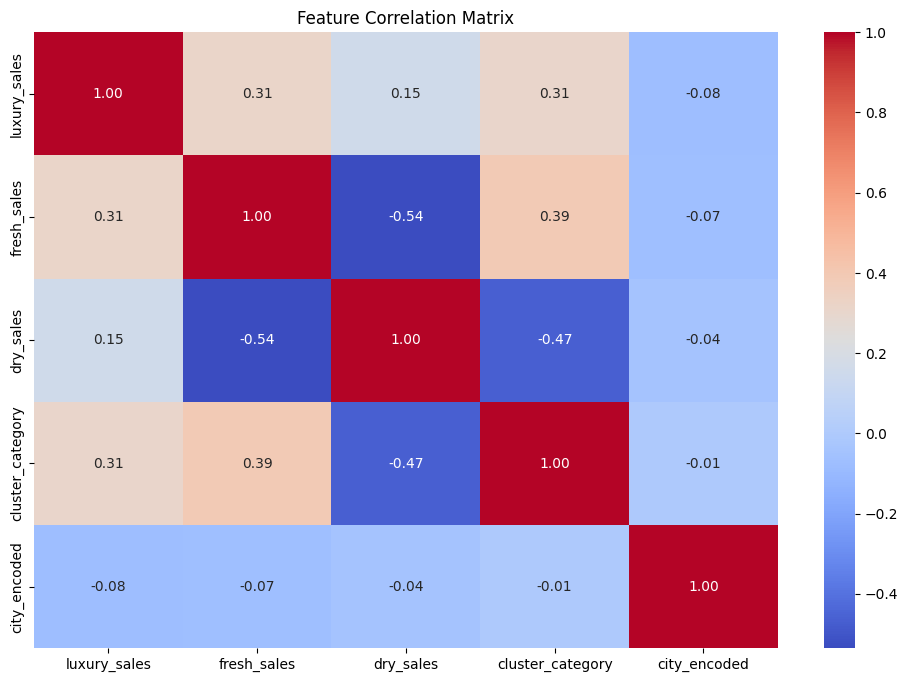

In [ ]:
# Correlation heatmap (Only numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


customers with high spending in luxury sales can be classified as Premium or High value Customers for Targeted marketing. customers Focusing on fresh and dry sales belongs to a budget conscious or Regular Shopper segment

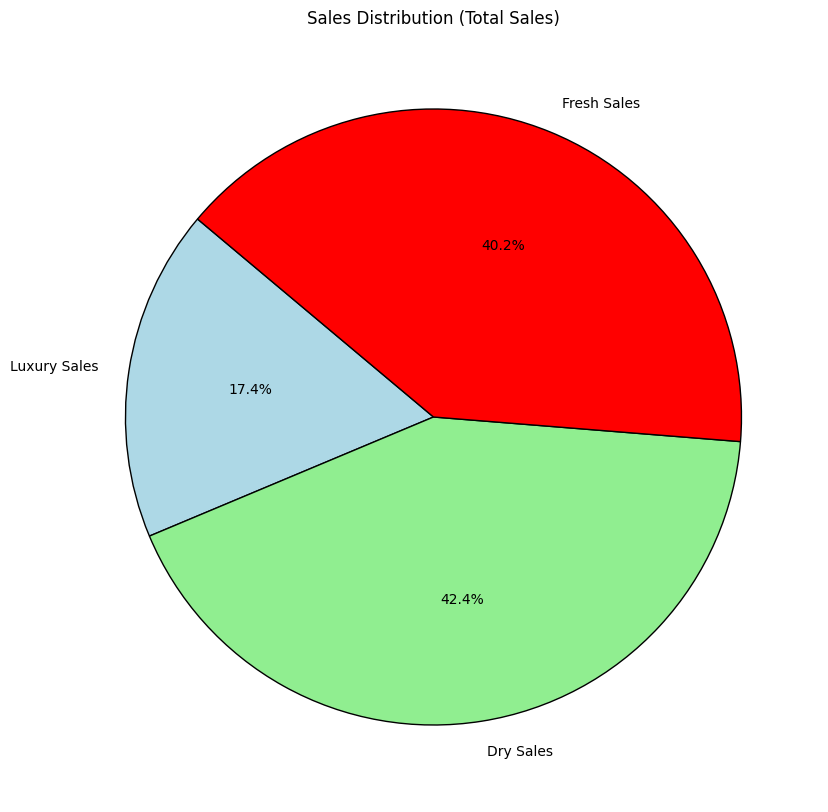

In [ ]:
# Calculate total sales for each category
total_luxury = df_train['luxury_sales'].sum()
total_dry = df_train['dry_sales'].sum()
total_fresh = df_train['fresh_sales'].sum()

# Data and labels for pie chart
sales_totals = [total_luxury, total_dry, total_fresh]
labels = ['Luxury Sales', 'Dry Sales', 'Fresh Sales']
colors = ['lightblue', 'lightgreen', 'red']

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(sales_totals, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Sales Distribution (Total Sales)')

# Show chart
plt.show()

segment customers based on their spending behaviour,identifying those who make frequent low value purchases vs. those who occasionally make high-value purchases

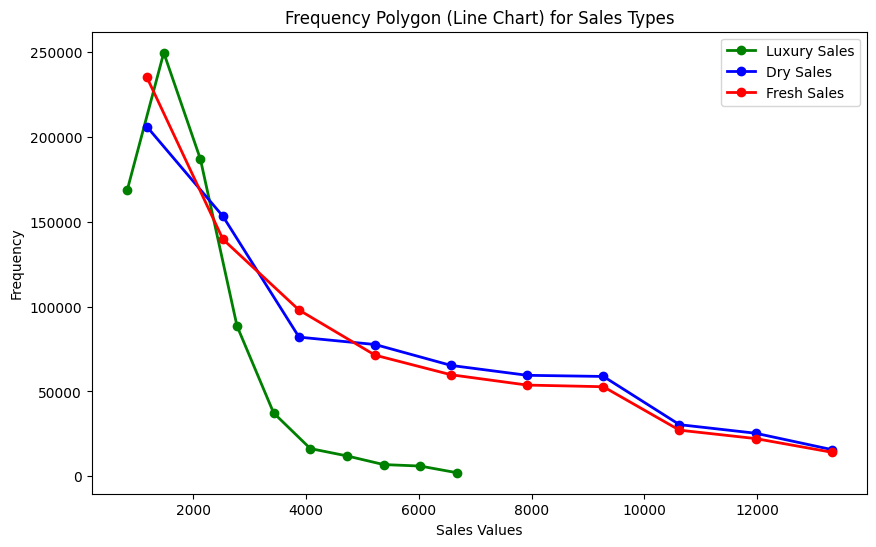

In [ ]:
# Create histogram data for each column
counts_luxury, bin_edges_luxury = np.histogram(df_train['luxury_sales'], bins=10)
bin_mids_luxury = 0.5 * (bin_edges_luxury[1:] + bin_edges_luxury[:-1])

counts_dry, bin_edges_dry = np.histogram(df_train['dry_sales'], bins=10)
bin_mids_dry = 0.5 * (bin_edges_dry[1:] + bin_edges_dry[:-1])

counts_fresh, bin_edges_fresh = np.histogram(df_train['fresh_sales'], bins=10)
bin_mids_fresh = 0.5 * (bin_edges_fresh[1:] + bin_edges_fresh[:-1])

# Plot line charts for all three columns
plt.figure(figsize=(10, 6))

plt.plot(bin_mids_luxury, counts_luxury, marker='o', color='green', linewidth=2, label='Luxury Sales')
plt.plot(bin_mids_dry, counts_dry, marker='o',color='blue', linewidth=2, label='Dry Sales')
plt.plot(bin_mids_fresh, counts_fresh,marker='o', color='red', linewidth=2, label='Fresh Sales')

# Add titles, labels, legend
plt.title('Frequency Polygon (Line Chart) for Sales Types')
plt.xlabel('Sales Values')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()
